In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [6]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band08_wn_1380_520',
                          'ng_10',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_5__5',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all1',
                          'bigsum',
                          'option_wgt_1',
                          'crd_1fdb14d',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [7]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band08_wn_1380_520',
                          'ng_10',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_5__5',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all1',
                          'bigsum',
                          'option_wgt_1',
                          'crd_1fdb14d',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [10]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 10 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [11]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [12]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [13]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [14]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1380

nband = 520

nv = 200

dv = 0.005

tsfc = 294.0

ng = 10

nref = 2

p_refs = (/ 1,  500 /)

t_refs = (/ 250, 250 /)

ng_refs = (/ 5, 5 /)

data wgt
     &     /5*1, 5*1/

planck_wgt_flux = 2

option_wgt = 1

include 'mls75.pro'


In [15]:
fig.display_hrefanchor()

In [16]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [17]:
table_dgdgs.display_hrefanchor()

In [18]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [19]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [20]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

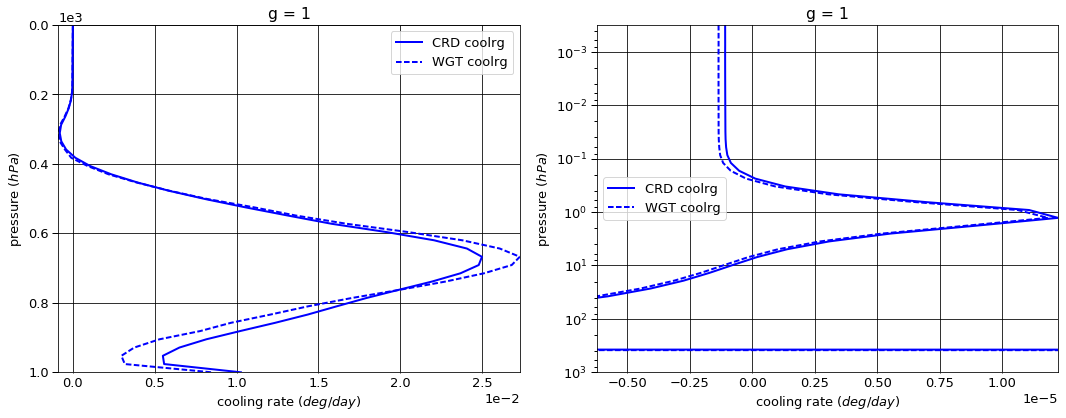

# Figure: cooling rate g-group 2

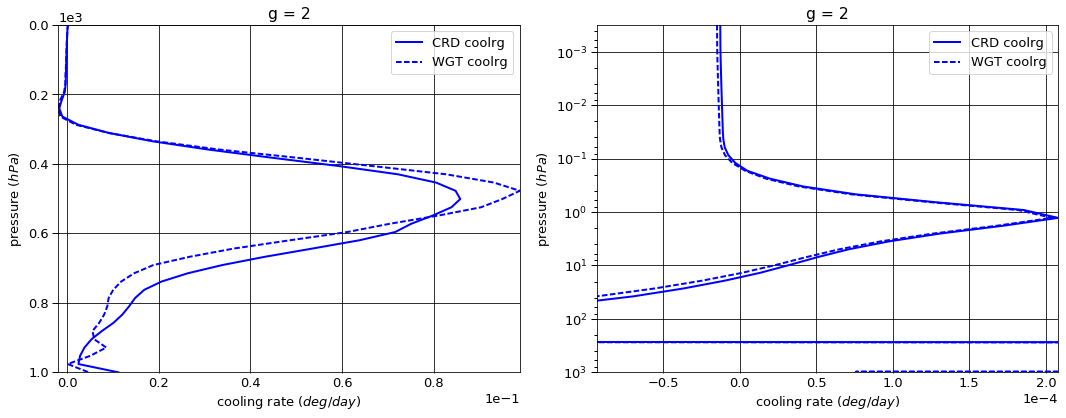

# Figure: cooling rate g-group 3

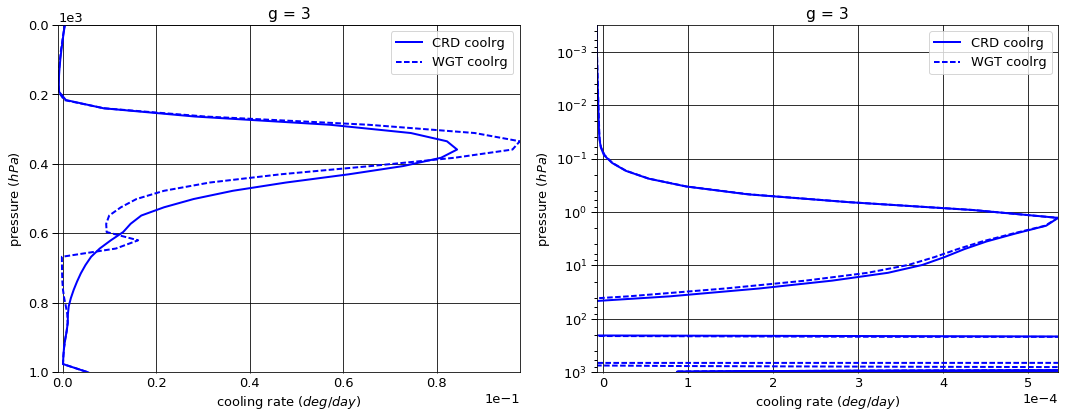

# Figure: cooling rate g-group 4

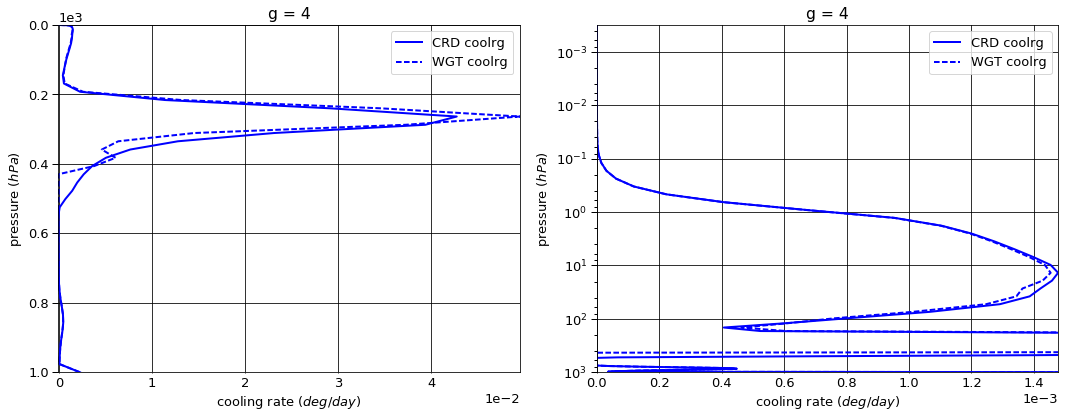

# Figure: cooling rate g-group 5

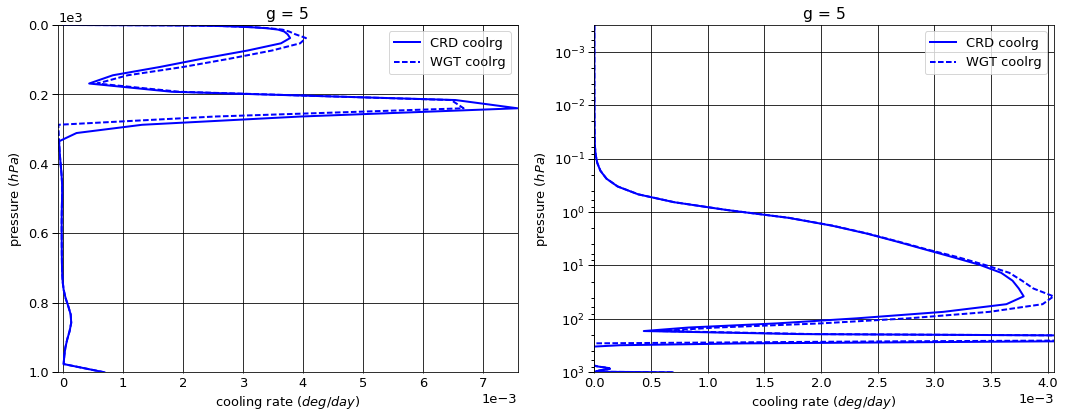

# Figure: cooling rate g-group 6

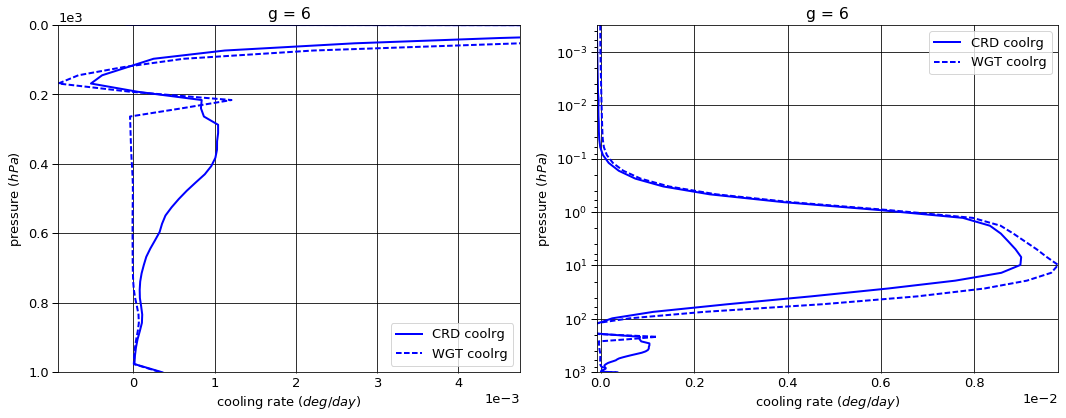

# Figure: cooling rate g-group 7

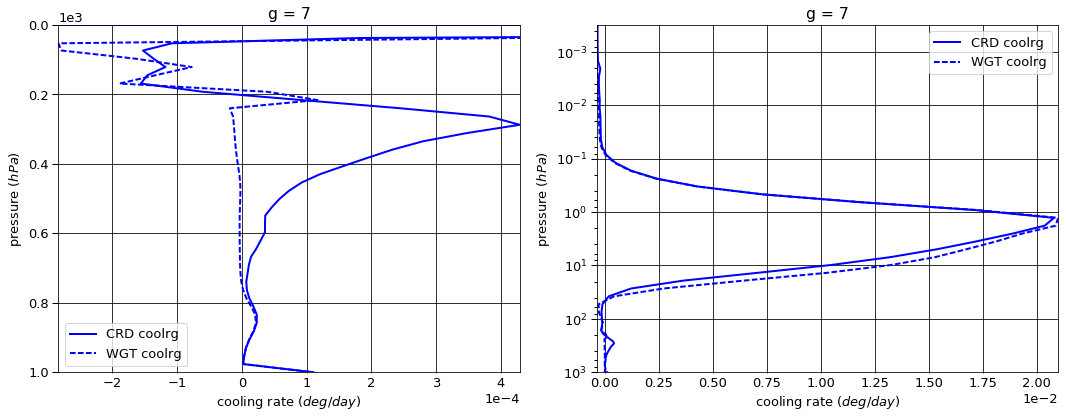

# Figure: cooling rate g-group 8

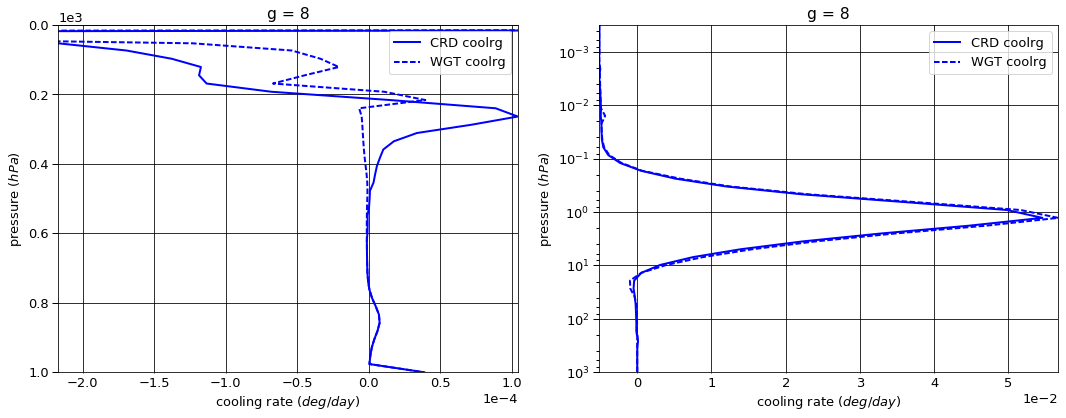

# Figure: cooling rate g-group 9

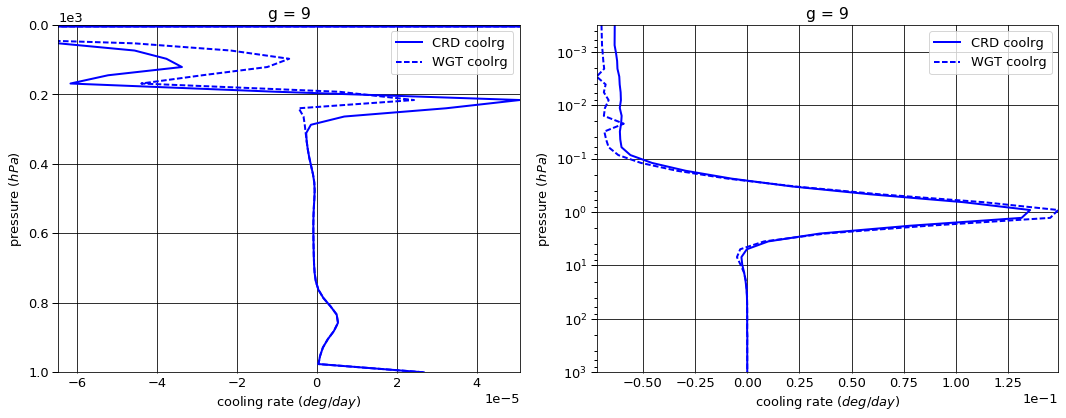

# Figure: cooling rate g-group 10

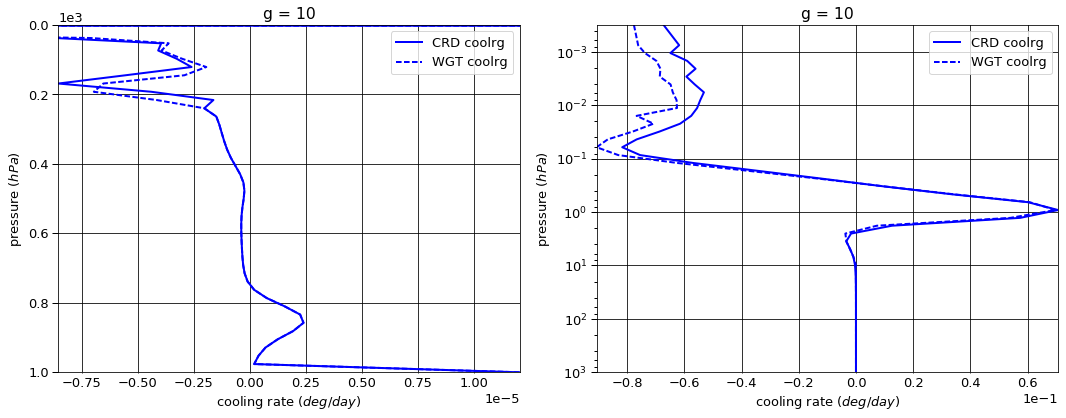

# Figure: cooling rate g-group total

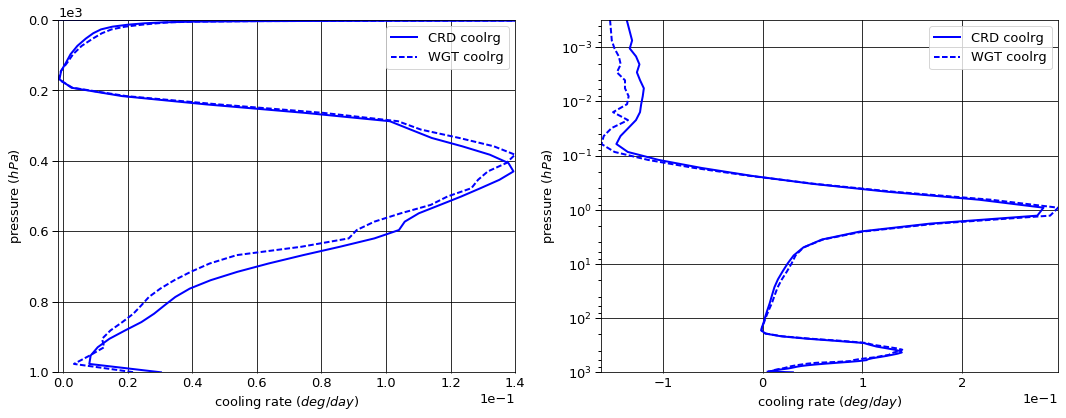

In [21]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [22]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg     fnetg
g  pressure level                                
1  0.0      1      -1.013918   0.000000 -1.013918
   1013.0   76     -2.039635   1.997116 -0.042519
2  0.0      1      -3.222523   0.000000 -3.222523
   1013.0   76     -9.907084   9.877758 -0.029326
3  0.0      1      -2.205129   0.000000 -2.205129
   1013.0   76    -11.456583  11.441323 -0.015260
4  0.0      1      -0.554343   0.000000 -0.554343
   1013.0   76     -4.760978   4.754657 -0.006320
5  0.0      1      -0.113977   0.000000 -0.113977
   1013.0   76     -1.454365   1.452430 -0.001935
6  0.0      1      -0.085392   0.000000 -0.085392
   1013.0   76     -0.714667   0.713672 -0.000995
7  0.0      1      -0.033826   0.000000 -0.033826
   1013.0   76     -0.232170   0.231860 -0.000310
8  0.0      1      -0.019521   0.000000 -0.019521
   1013.0   76     -0.082227   0.082118 -0.000109
9  0.0      1      -0.020737   0.000000 -0.020737
   1013.0   76     -0.056608   0.056533 -0.000075
10 0.0      1      -0.005616   0.000000 -0.005616
   1013.0   76     -0.025299   0.025265 -0.000034


WGT


flug       fldg     fnetg
g  pressure level                                
1  0.0      1      -0.970929   0.000000 -0.970929
   1013.0   76     -2.039635   2.013061 -0.026574
2  0.0      1      -3.038993   0.000000 -3.038993
   1013.0   76     -9.907084   9.894090 -0.012994
3  0.0      1      -2.065290   0.000000 -2.065290
   1013.0   76    -11.456583  11.441323 -0.015260
4  0.0      1      -0.521405   0.000000 -0.521405
   1013.0   76     -4.760978   4.754657 -0.006320
5  0.0      1      -0.108757   0.000000 -0.108757
   1013.0   76     -1.454365   1.452430 -0.001935
6  0.0      1      -0.063155   0.000000 -0.063155
   1013.0   76     -0.714667   0.713722 -0.000945
7  0.0      1      -0.032965   0.000000 -0.032965
   1013.0   76     -0.232170   0.231861 -0.000309
8  0.0      1      -0.021004   0.000000 -0.021004
   1013.0   76     -0.082227   0.082118 -0.000109
9  0.0      1      -0.021755   0.000000 -0.021755
   1013.0   76     -0.056608   0.056533 -0.000075
10 0.0      1      -0.004896   0.000000 -0.004896
   1013.0   76     -0.025299   0.025265 -0.000034


WGT - CRD


flug          fldg         fnetg
g  pressure level                                      
1  0.0      1      0.042989  0.000000e+00  4.298865e-02
   1013.0   76     0.000000  1.594500e-02  1.594497e-02
2  0.0      1      0.183531  0.000000e+00  1.835308e-01
   1013.0   76     0.000000  1.633270e-02  1.633269e-02
3  0.0      1      0.139839  0.000000e+00  1.398392e-01
   1013.0   76     0.000000  0.000000e+00  5.870000e-07
4  0.0      1      0.032938  0.000000e+00  3.293799e-02
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
5  0.0      1      0.005220  0.000000e+00  5.219870e-03
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
6  0.0      1      0.022237  0.000000e+00  2.223736e-02
   1013.0   76     0.000000  4.966000e-05  4.966437e-05
7  0.0      1      0.000861  0.000000e+00  8.613210e-04
   1013.0   76     0.000000  8.700000e-07  8.737000e-07
8  0.0      1     -0.001483  0.000000e+00 -1.483094e-03
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
9  0.0      1     -0.001018  0.000000e+00 -1.018308e-03
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
10 0.0      1      0.000719  0.000000e+00  7.193773e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -1.078014e-06
   1001.112500 75     1.026703e-02
2  0.000312    1     -1.267595e-05
   1001.112500 75     1.111658e-02
3  0.000312    1     -7.332418e-06
   1001.112500 75     5.442486e-03
4  0.000312    1     -2.801607e-07
   1001.112500 75     2.254127e-03
5  0.000312    1      1.030247e-07
   1001.112500 75     6.899891e-04
6  0.000312    1     -8.660781e-05
   1001.112500 75     3.568740e-04
7  0.000312    1     -3.379776e-04
   1001.112500 75     1.108684e-04
8  0.000312    1     -5.082744e-03
   1001.112500 75     3.898226e-05
9  0.000312    1     -6.341319e-02
   1001.112500 75     2.677947e-05
10 0.000312    1     -6.725737e-02
   1001.112500 75     1.205077e-05


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -1.341052e-06
   1001.112500 75     8.480004e-03
2  0.000312    1     -1.477616e-05
   1001.112500 75     4.634857e-03
3  0.000312    1     -7.164171e-06
   1001.112500 75     5.441882e-03
4  0.000312    1     -2.098365e-07
   1001.112500 75     2.254127e-03
5  0.000312    1      1.179353e-07
   1001.112500 75     6.899891e-04
6  0.000312    1     -8.802404e-06
   1001.112500 75     3.371201e-04
7  0.000312    1     -3.790301e-04
   1001.112500 75     1.102516e-04
8  0.000312    1     -5.127575e-03
   1001.112500 75     3.898226e-05
9  0.000312    1     -6.975690e-02
   1001.112500 75     2.677947e-05
10 0.000312    1     -7.760918e-02
   1001.112500 75     1.205077e-05


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -2.630386e-07
   1001.112500 75    -1.787021e-03
2  0.000312    1     -2.100208e-06
   1001.112500 75    -6.481723e-03
3  0.000312    1      1.682462e-07
   1001.112500 75    -6.043000e-07
4  0.000312    1      7.032424e-08
   1001.112500 75     0.000000e+00
5  0.000312    1      1.491056e-08
   1001.112500 75     0.000000e+00
6  0.000312    1      7.780541e-05
   1001.112500 75    -1.975393e-05
7  0.000312    1     -4.105249e-05
   1001.112500 75    -6.168100e-07
8  0.000312    1     -4.483070e-05
   1001.112500 75     0.000000e+00
9  0.000312    1     -6.343710e-03
   1001.112500 75     0.000000e+00
10 0.000312    1     -1.035181e-02
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-7.274982,0.000000,-7.274982
1013.0,76,-30.729616,30.632733,-0.096884



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-6.849149,0.000000,-6.849149
1013.0,76,-30.729616,30.665061,-0.064555



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.425833,0.000000,0.425833
1013.0,76,0.000000,0.032328,0.032329


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.136199
1001.112500,75,0.030316



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.152905
1001.112500,75,0.022026



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.016706
1001.112500,75,-0.008290


In [23]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.095183,0.062475
2,0.311394,0.328647
3,0.365288,0.370848
4,0.148183,0.154719
5,0.045423,0.047114
6,0.021952,0.023352
7,0.007365,0.007516
8,0.002625,0.002670
9,0.001788,0.001844


In [24]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.086608e-23
2,9.141908e-23
3,7.691321e-22
4,6.470905e-21
5,5.444137e-20
6,1.190395e-21
7,1.055431e-20
8,9.357692e-20
9,8.296741e-19


In [25]:
def spreadsheet():
    ng = 10
    ng_refs = [5, 5]
    p_refs = [1, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [26]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.086608e-23,NaN,0.095183,0.062475,0.095183,0.062475,500.0
2,9.141908e-23,8.413255,0.311394,0.328647,0.406577,0.391122,500.0
3,7.691321e-22,8.413256,0.365288,0.370848,0.771865,0.761970,500.0
4,6.470905e-21,8.413256,0.148183,0.154719,0.920048,0.916689,500.0
5,5.444137e-20,8.413255,0.045423,0.047114,0.965471,0.963804,500.0
6,1.190395e-21,0.021866,0.021952,0.023352,0.987423,0.987155,1.0
7,1.055431e-20,8.866226,0.007365,0.007516,0.994788,0.994671,1.0
8,9.357692e-20,8.866227,0.002625,0.002670,0.997413,0.997341,1.0
9,8.296741e-19,8.866226,0.001788,0.001844,0.999202,0.999186,1.0


In [27]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [28]:
pd.set_option('display.max_rows', None)
#display.display(
#    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
#                index_col=[0, 1],
#                sep=r'\s+')
#    )
pd.reset_option('display.max_rows')

# Histogram of wavenumbers in g-group 1

In [29]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [30]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')